# Pystac-client Python Library
* [Medium post](https://medium.com/rotten-grapes/download-sentinel-data-within-seconds-in-python-8cc9a8c3e23c) - pystac-client & odc-stac
* [Pystac-client documentation](https://pystac-client.readthedocs.io/en/latest/)

In [56]:
from pystac_client import Client
from odc.stac import load
import odc.geo
import pathlib

In [57]:
data_path = pathlib.Path.cwd() / ".." / "data"
(data_path / "rasters").mkdir(parents=True, exist_ok=True)

Link to available STAC catalogues: [https://stacindex.org/catalogs#/](https://stacindex.org/catalogs#/)
* Copernicus - "https://catalogue.dataspace.copernicus.eu/stac"
* Earth Search - "https://earth-search.aws.element84.com/v1"

In [58]:
# use publically available stac link such as
client = Client.open("https://earth-search.aws.element84.com/v1") 

# ID of the collection
collection = "sentinel-2-l2a"

# Geometry of AOI
import geopandas
geometry_df = geopandas.read_file(data_path / "vectors" / f"test.geojson")
geometry = geometry_df.iloc[0].geometry

In [63]:
# Specific Date
date_YYMMDD = "2024-01-21"
filters = {"eo:cloud_cover":{"lt":60}} 
# run pystac client search to see available dataset
search = client.search(
    collections=[collection], intersects=geometry, datetime=date_YYMMDD, query=filters
)
# spit out data as GeoJSON dictionary
results_dict = search.item_collection_as_dict()
results_dict.keys()
### Console - {'type': 'FeatureCollection', 'features': []}

dict_keys(['type', 'features'])

In [64]:
import pandas
pandas.DataFrame.from_records(results_dict['features'])

,type,stac_version,id,properties,geometry,links,assets,bbox,stac_extensions,collection
0,Feature,1.0.0,S2A_59GLK_20240121_0_L2A,"{'created': '2024-01-22T02:18:41.476Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[168.4568...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[168.4118389584102, -46.13562216351037, 169.85...",[https://stac-extensions.github.io/eo/v1.1.0/s...,sentinel-2-l2a


In [65]:
# results_dict['features'][1]["properties"]

In [66]:
# Complete month
date_YYMM = "2023-01"
filters = {"eo:cloud_cover":{"lt":10}} 
# run pystac client search to see available dataset
search = client.search(
    collections=[collection], intersects=geometry, datetime=date_YYMM, query=filters
) 
# spit out data as GeoJSON dictionary
#print(search.item_collection_as_dict())
# loop through each item
#for item in search.items_as_dicts():
#    print(item.keys())
results_dict = search.item_collection_as_dict()
pandas.DataFrame.from_records(results_dict['features'])

,type,stac_version,id,properties,geometry,links,assets,bbox,stac_extensions,collection
0,Feature,1.0.0,S2B_59GLJ_20230128_0_L2A,"{'created': '2023-01-29T03:20:18.724Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[169.3537...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[168.92865873919354, -47.03555367406178, 169.8...",[https://stac-extensions.github.io/grid/v1.0.0...,sentinel-2-l2a
1,Feature,1.0.0,S2B_59GNJ_20230128_0_L2A,"{'created': '2023-01-29T03:19:43.484Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[170.9997...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[170.99974988940386, -47.0417081267628, 172.44...",[https://stac-extensions.github.io/view/v1.0.0...,sentinel-2-l2a
2,Feature,1.0.0,S2B_59GLK_20230128_0_L2A,"{'created': '2023-01-29T03:11:25.435Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[169.7296...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[169.31660214587635, -46.13562216351037, 169.8...",[https://stac-extensions.github.io/view/v1.0.0...,sentinel-2-l2a
3,Feature,1.0.0,S2B_59GMK_20230128_0_L2A,"{'created': '2023-01-29T03:18:35.399Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[169.7296...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[169.70620015296257, -46.14151739621053, 171.1...",[https://stac-extensions.github.io/processing/...,sentinel-2-l2a
4,Feature,1.0.0,S2B_59GLL_20230128_0_L2A,"{'created': '2023-01-29T03:10:52.905Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[169.8495...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[169.693595395168, -45.23552940931099, 169.856...",[https://stac-extensions.github.io/grid/v1.0.0...,sentinel-2-l2a
5,Feature,1.0.0,S2B_59GML_20230128_0_L2A,"{'created': '2023-01-29T03:21:30.076Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[170.0959...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[169.7267862877981, -45.241256254245506, 171.1...",[https://stac-extensions.github.io/processing/...,sentinel-2-l2a
6,Feature,1.0.0,S2B_59GNK_20230121_0_L2A,"{'created': '2023-01-22T04:08:08.126Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[170.9997...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[170.9997566034791, -45.54689304993187, 171.13...",[https://stac-extensions.github.io/processing/...,sentinel-2-l2a
7,Feature,1.0.0,S2B_59GNL_20230121_0_L2A,"{'created': '2023-01-22T04:07:58.822Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[170.9997...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[170.99975791548314, -45.24042338416971, 171.4...",[https://stac-extensions.github.io/eo/v1.0.0/s...,sentinel-2-l2a
8,Feature,1.0.0,S2B_59GLJ_20230118_0_L2A,"{'created': '2023-01-19T03:26:50.715Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[169.3511...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[168.92708041064168, -47.03555367406178, 169.8...",[https://stac-extensions.github.io/grid/v1.0.0...,sentinel-2-l2a
9,Feature,1.0.0,S2B_59GMJ_20230118_0_L2A,"{'created': '2023-01-19T03:30:38.049Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[169.7069...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[169.68329322274275, -47.04163607644888, 171.1...",[https://stac-extensions.github.io/processing/...,sentinel-2-l2a


In [70]:
# additional filters as per metadata 
filters = {
    "eo:cloud_cover":{"lt":0.2}, # "s2:vegetation_percentage": {"gt": 25}
}
# run pystac client search to see available dataset 
search = client.search(collections=[collection], intersects=geometry , query=filters ,datetime=date_YYMM) #bbox=tas_bbox
#spit out data as GeoJSON dictionary
results_dict = search.item_collection_as_dict()
pandas.DataFrame.from_records(results_dict['features'])

,type,stac_version,id,properties,geometry,links,assets,bbox,stac_extensions,collection
0,Feature,1.0.0,S2B_59GLK_20230128_0_L2A,"{'created': '2023-01-29T03:11:25.435Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[169.7296...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[169.31660214587635, -46.13562216351037, 169.8...",[https://stac-extensions.github.io/view/v1.0.0...,sentinel-2-l2a
1,Feature,1.0.0,S2B_59GLL_20230128_0_L2A,"{'created': '2023-01-29T03:10:52.905Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[169.8495...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[169.693595395168, -45.23552940931099, 169.856...",[https://stac-extensions.github.io/grid/v1.0.0...,sentinel-2-l2a
2,Feature,1.0.0,S2B_59GLL_20230118_0_L2A,"{'created': '2023-01-19T03:26:22.810Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[169.8495...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[169.69206671596154, -45.23552940931303, 169.8...",[https://stac-extensions.github.io/eo/v1.0.0/s...,sentinel-2-l2a
3,Feature,1.0.0,S2B_59GLJ_20230108_0_L2A,"{'created': '2023-01-09T04:03:50.644Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[169.3507...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[168.9265545722867, -47.03555367406178, 169.83...",[https://stac-extensions.github.io/mgrs/v1.0.0...,sentinel-2-l2a
4,Feature,1.0.0,S2B_59GMJ_20230108_0_L2A,"{'created': '2023-01-09T04:09:12.796Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[169.7069...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[169.68329322274275, -47.04163607644888, 171.1...",[https://stac-extensions.github.io/processing/...,sentinel-2-l2a
5,Feature,1.0.0,S2B_59GLK_20230108_0_L2A,"{'created': '2023-01-09T04:03:00.784Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[169.7276...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[169.31375635983053, -46.13562216351037, 169.8...",[https://stac-extensions.github.io/processing/...,sentinel-2-l2a
6,Feature,1.0.0,S2B_59GLL_20230108_0_L2A,"{'created': '2023-01-09T03:56:13.958Z', 'platf...","{'type': 'Polygon', 'coordinates': [[[169.8495...","[{'rel': 'self', 'type': 'application/geo+json...",{'aot': {'href': 'https://sentinel-cogs.s3.us-...,"[169.6915572713635, -45.2355294093138, 169.856...",[https://stac-extensions.github.io/mgrs/v1.0.0...,sentinel-2-l2a


In [71]:
#load the data in xarray format
data = load(search.items(), geopolygon=geometry, groupby="solar_day", chunks={})
data

<xarray.Dataset> Size: 60GB
Dimensions:       (y: 20296, x: 14927, time: 3)
Coordinates:
  * y             (y) float64 162kB 5.027e+06 5.027e+06 ... 4.825e+06 4.825e+06
  * x             (x) float64 119kB 3.671e+05 3.671e+05 ... 5.164e+05 5.164e+05
    spatial_ref   int32 4B 32759
  * time          (time) datetime64[ns] 24B 2023-01-08T22:28:45.152000 ... 20...
Data variables: (12/32)
    aot           (time, y, x) uint16 2GB dask.array<chunksize=(1, 20296, 14927), meta=np.ndarray>
    blue          (time, y, x) uint16 2GB dask.array<chunksize=(1, 20296, 14927), meta=np.ndarray>
    coastal       (time, y, x) uint16 2GB dask.array<chunksize=(1, 20296, 14927), meta=np.ndarray>
    green         (time, y, x) uint16 2GB dask.array<chunksize=(1, 20296, 14927), meta=np.ndarray>
    nir           (time, y, x) uint16 2GB dask.array<chunksize=(1, 20296, 14927), meta=np.ndarray>
    nir08         (time, y, x) uint16 2GB dask.array<chunksize=(1, 20296, 14927), meta=np.ndarray>
    ...            ...
    rededge3-jp2  (time, y, x) uint16 2GB dask.array<chunksize=(1, 20296, 14927), meta=np.ndarray>
    scl-jp2       (time, y, x) uint8 909MB dask.array<chunksize=(1, 20296, 14927), meta=np.ndarray>
    swir16-jp2    (time, y, x) uint16 2GB dask.array<chunksize=(1, 20296, 14927), meta=np.ndarray>
    swir22-jp2    (time, y, x) uint16 2GB dask.array<chunksize=(1, 20296, 14927), meta=np.ndarray>
    visual-jp2    (time, y, x) float32 4GB dask.array<chunksize=(1, 20296, 14927), meta=np.ndarray>
    wvp-jp2       (time, y, x) uint16 2GB dask.array<chunksize=(1, 20296, 14927), meta=np.ndarray>

In [74]:
import rioxarray
data.rio.crs

CRS.from_epsg(32759)

In [75]:
# create the index without considering scale or offset
ndvi = (data.nir - data.red) / (data.nir + data.red)

In [ ]:
ndwi = (data.green-data.nir)/(data.green+data.nir)

In [82]:
ndvi.rio.crs

CRS.from_epsg(32759)

In [81]:
ndvi.to_netcdf(data_path / "rasters" / "test.nc", format="NETCDF4", engine="netcdf4") #, encoding={"zlib": True, "complevel": 2})

C:\Users\pearsonra\.conda\envs\satellite\Lib\site-packages\dask\core.py:133: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


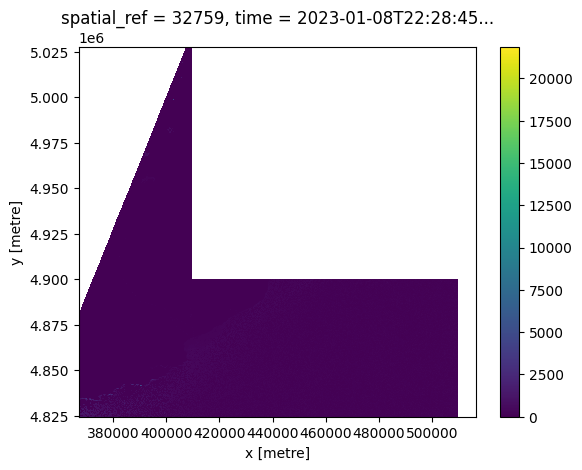

In [78]:
ndvi.isel(time=0).plot()

In [11]:
# export data as tiff
odc.geo.xr.write_cog(ndvi,fname='ndvi.tiff',  overwrite=True)

<xarray.DataArray (time: 1, y: 18, x: 20)> Size: 3kB
dask.array<truediv, shape=(1, 18, 20), dtype=float64, chunksize=(1, 18, 20), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 144B 2.153e+06 2.153e+06 ... 2.152e+06 2.152e+06
  * x            (x) float64 160B 4.645e+05 4.646e+05 ... 4.647e+05 4.647e+05
    spatial_ref  int32 4B 32643
  * time         (time) datetime64[ns] 8B 2023-01-09T05:43:37.058000

In [15]:
# export data as tiff
odc.geo.xr.write_cog(ndvi,fname=data_path / "rasters" / "ndvi.tiff",  overwrite=True)

WindowsPath('c:/Local/repos/kelp-dashboard-demo/notebooks/../data/rasters/ndvi.tiff')

C:\Users\pearsonra\.conda\envs\satellite\Lib\site-packages\dask\core.py:133: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
